In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hong_for = pd.read_csv('../data/hong_for.csv')
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,수,5,외국인,1.0,0
1,2022,6,2022-06-01,수,6,외국인,0.0,0
2,2022,6,2022-06-01,수,7,외국인,1.0,0
3,2022,6,2022-06-01,수,8,외국인,0.0,0
4,2022,6,2022-06-01,수,9,외국인,3.0,0


In [3]:
hong_for['date']=pd.to_datetime(hong_for['date'])
hong_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       14620 non-null  int64         
 1   월       14620 non-null  int64         
 2   date    14620 non-null  datetime64[ns]
 3   day     14620 non-null  object        
 4   time    14620 non-null  int64         
 5   승객유형    14620 non-null  object        
 6   승객수     14620 non-null  float64       
 7   vac     14620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 913.9+ KB


### pivot으로 일자별 히트맵 다시 확인
- 코로나 데이터 걸러내기
- 환율 컬럼?
- 항공권?

> **승객유형별 데이터는 2021년 이후 데이터만 제공하고 있어서 코로나 이전 데이터는 사용할 수 없었다.**

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from cu

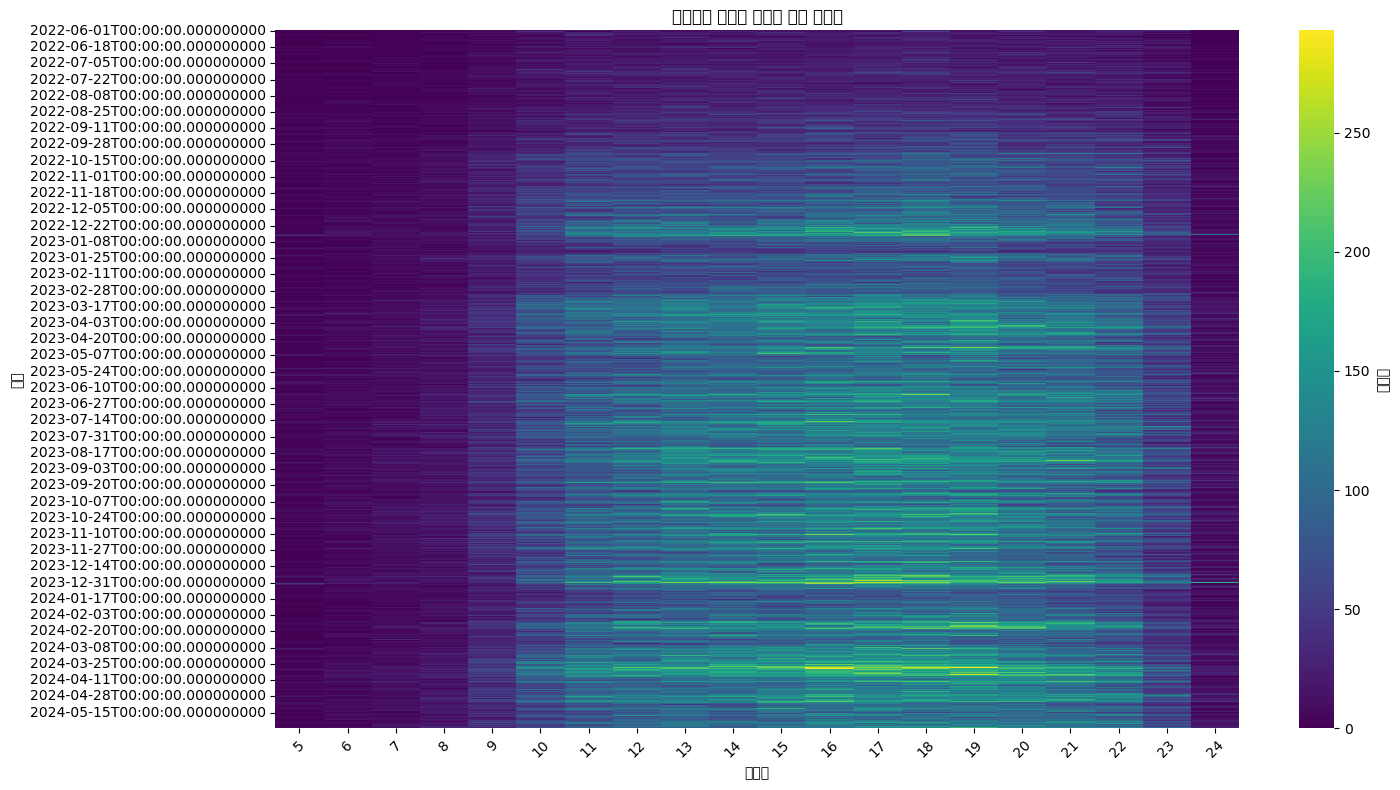

In [4]:
# 피벗 테이블 생성
pivot_table = hong_for.pivot_table(
    index='date',     
    columns='time', 
    values='승객수',
    aggfunc='sum',
)

# 히트맵 생성
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, 
            annot=False,          # 값 표시
            fmt='.0f',           # 소수점 없이 표시
            cmap='viridis',       # 색상 맵 설정
            cbar_kws={'label': '승객수'})  #

# 그래프 제목과 레이블 설정
plt.title('시간대별 일자별 외국인 승객 히트맵')
plt.xlabel('시간대')
plt.ylabel('일자')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

- 2022년 10월: 정부가 입출국 규제 조치를 대폭 완화했습니다. 이로 인해 해외여행 수요가 폭발적으로 증가하기 시작했습니다.
- 2023년 3월: 정부가 「내수활성화 대책」을 발표하며 인바운드 여행을 촉진하기 위한 다양한 정책을 펼쳤습니다.
- 2023-2024년: 문화체육관광부와 한국관광공사가 이 기간을 '한국방문의 해'로 지정하고, 전 세계 15개 도시에서 한국 관광의 매력을 집중적으로 홍보하는 'K-관광 로드쇼'를 진행했습니다.
- 2023년 12월: 정부는 외국인 관광객 유치를 위해 다음과 같은 추가 조치를 발표했습니다.

**규제 완화시점(2022.10)과 히트맵 그래프의 승객수 증가 시기가 일치한다.**

> 2022.11 데이터부터 사용   
> 2개년 데이터 그대로 사용하고, 규제 완화 컬럼을 추가?

In [5]:
hong_for=hong_for[hong_for['date']>='2022-11-01']
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
3060,2022,11,2022-11-01,화,5,외국인,6.0,0
3061,2022,11,2022-11-01,화,6,외국인,8.0,0
3062,2022,11,2022-11-01,화,7,외국인,13.0,0
3063,2022,11,2022-11-01,화,8,외국인,7.0,0
3064,2022,11,2022-11-01,화,9,외국인,33.0,0


In [6]:
hong_for.reset_index(drop=True, inplace=True)
hong_for.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,11,2022-11-01,화,5,외국인,6.0,0
1,2022,11,2022-11-01,화,6,외국인,8.0,0
2,2022,11,2022-11-01,화,7,외국인,13.0,0
3,2022,11,2022-11-01,화,8,외국인,7.0,0
4,2022,11,2022-11-01,화,9,외국인,33.0,0


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/1608848663.py:26: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from cu

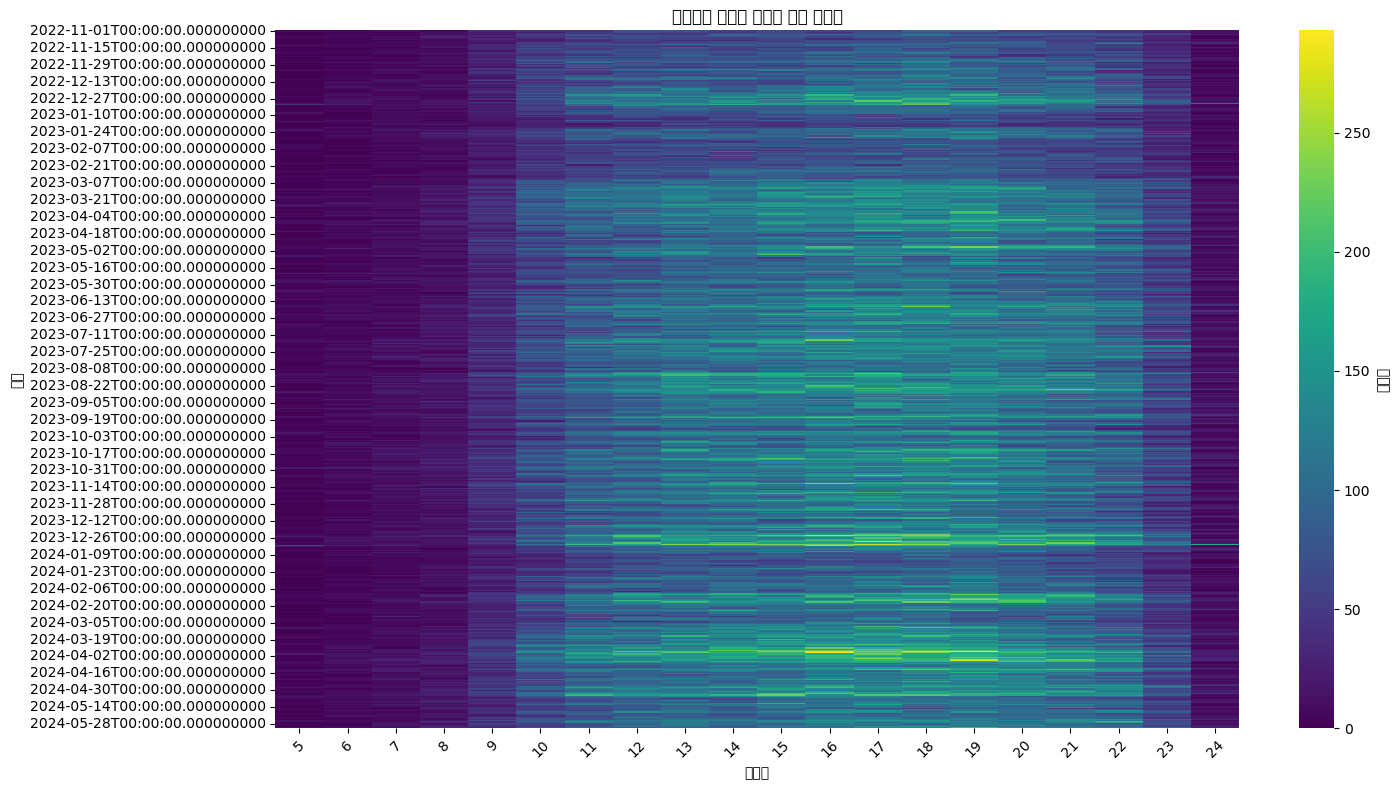

In [7]:
# 피벗 테이블 생성
pivot_table = hong_for.pivot_table(
    index='date',     
    columns='time', 
    values='승객수',
    aggfunc='sum',
)

# 히트맵 생성
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, 
            annot=False,          # 값 표시
            fmt='.0f',           # 소수점 없이 표시
            cmap='viridis',       # 색상 맵 설정
            cbar_kws={'label': '승객수'})  #

# 그래프 제목과 레이블 설정
plt.title('시간대별 일자별 외국인 승객 히트맵')
plt.xlabel('시간대')
plt.ylabel('일자')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [8]:
hong_for['승객수'].describe()

count    11560.000000
mean        74.825087
std         51.988366
min          0.000000
25%         24.000000
50%         77.000000
75%        112.000000
max        293.000000
Name: 승객수, dtype: float64

In [9]:
top = hong_for.nlargest(50, '승객수')['date'].unique()


In [10]:
top

<DatetimeArray>
['2024-03-30 00:00:00', '2024-03-29 00:00:00', '2024-04-05 00:00:00',
 '2023-12-31 00:00:00', '2023-12-29 00:00:00', '2023-12-24 00:00:00',
 '2024-01-01 00:00:00', '2024-02-15 00:00:00', '2024-04-04 00:00:00',
 '2023-11-11 00:00:00', '2023-04-29 00:00:00', '2023-06-17 00:00:00',
 '2023-08-25 00:00:00', '2023-12-23 00:00:00', '2023-12-30 00:00:00',
 '2024-02-11 00:00:00', '2024-02-17 00:00:00', '2024-03-28 00:00:00',
 '2024-03-31 00:00:00', '2024-05-04 00:00:00', '2023-07-15 00:00:00',
 '2024-03-26 00:00:00', '2024-03-09 00:00:00', '2024-04-03 00:00:00',
 '2024-02-14 00:00:00', '2024-03-27 00:00:00', '2023-01-01 00:00:00',
 '2022-12-29 00:00:00', '2024-02-16 00:00:00', '2024-04-06 00:00:00']
Length: 30, dtype: datetime64[ns]

In [11]:
hong_for.nlargest(20, '승객수')

,년,월,date,day,time,승객유형,승객수,vac
10311,2024,3,2024-03-30,토,16,외국인,293.0,0
10294,2024,3,2024-03-29,금,19,외국인,292.0,0
10291,2024,3,2024-03-29,금,16,외국인,272.0,0
10293,2024,3,2024-03-29,금,18,외국인,269.0,0
10434,2024,4,2024-04-05,금,19,외국인,269.0,0
8512,2023,12,2023-12-31,일,17,외국인,265.0,0
8472,2023,12,2023-12-29,금,17,외국인,259.0,0
8371,2023,12,2023-12-24,일,16,외국인,258.0,0
8531,2024,1,2024-01-01,월,16,외국인,250.0,1
9434,2024,2,2024-02-15,목,19,외국인,243.0,1


In [12]:
over200 = hong_for[hong_for['승객수']>=200]
over200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 1172 to 11457
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       114 non-null    int64         
 1   월       114 non-null    int64         
 2   date    114 non-null    datetime64[ns]
 3   day     114 non-null    object        
 4   time    114 non-null    int64         
 5   승객유형    114 non-null    object        
 6   승객수     114 non-null    float64       
 7   vac     114 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 8.0+ KB


In [13]:
over200['date'].unique()

<DatetimeArray>
['2022-12-29 00:00:00', '2022-12-31 00:00:00', '2023-01-01 00:00:00',
 '2023-03-31 00:00:00', '2023-04-06 00:00:00', '2023-04-08 00:00:00',
 '2023-04-29 00:00:00', '2023-05-05 00:00:00', '2023-06-17 00:00:00',
 '2023-07-08 00:00:00', '2023-07-15 00:00:00', '2023-08-12 00:00:00',
 '2023-08-13 00:00:00', '2023-08-22 00:00:00', '2023-08-24 00:00:00',
 '2023-08-25 00:00:00', '2023-09-17 00:00:00', '2023-10-20 00:00:00',
 '2023-10-21 00:00:00', '2023-11-04 00:00:00', '2023-11-11 00:00:00',
 '2023-11-25 00:00:00', '2023-12-02 00:00:00', '2023-12-23 00:00:00',
 '2023-12-24 00:00:00', '2023-12-25 00:00:00', '2023-12-26 00:00:00',
 '2023-12-27 00:00:00', '2023-12-28 00:00:00', '2023-12-29 00:00:00',
 '2023-12-30 00:00:00', '2023-12-31 00:00:00', '2024-01-01 00:00:00',
 '2024-02-11 00:00:00', '2024-02-14 00:00:00', '2024-02-15 00:00:00',
 '2024-02-16 00:00:00', '2024-02-17 00:00:00', '2024-03-08 00:00:00',
 '2024-03-09 00:00:00', '2024-03-23 00:00:00', '2024-03-26 00:00:00',
 '20

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4282944733.py:18: UserWarning:

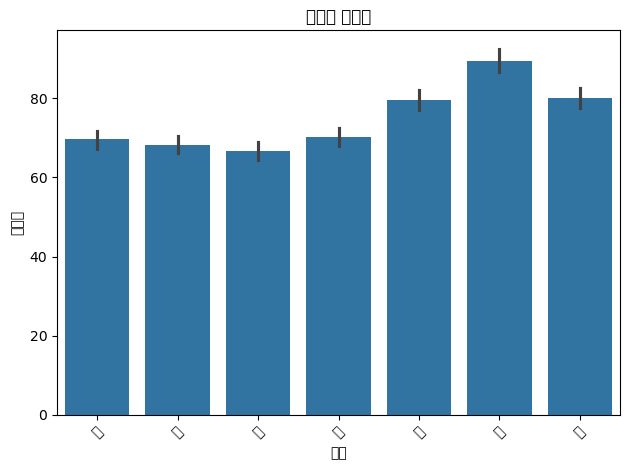

In [14]:
# day 컬럼을 카테고리형으로 변환하고 순서 지정
# 요일 순서 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
hong_for['day'] = pd.Categorical(hong_for['day'], categories=weekday_order, ordered=True)


sns.barplot(data=hong_for, x='day', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('요일')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/3337012875.py:12: UserWarning

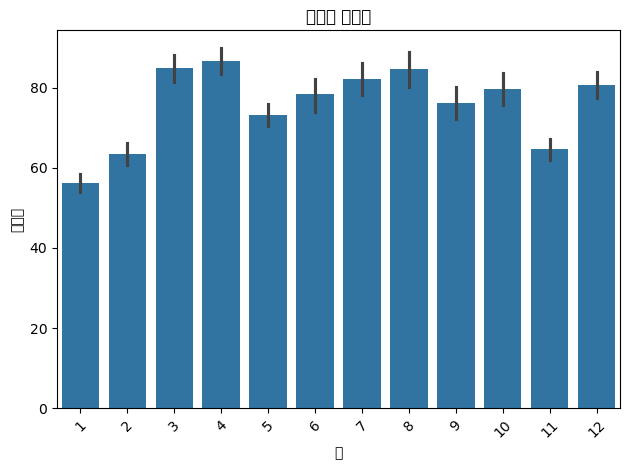

In [15]:
sns.barplot(data=hong_for, x='월', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('월')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

> 22년도의 11-12월 데이터가 포함되어서 11-12월의 평균 승객수만 감소하는 문제가 발생했다.    
-> 22년 데이터를 그대로 사용하고, 완화규제 컬럼을 추가?

---
### 규제 이후 데이터 모델 먼저 생성
- 요일 범주화(월-목, 금/일, 토)
- Season column(1/2~2/28, 12/24~1/1, 나머지)

In [16]:
# hong_for.drop(
#     ['vac'],
#     axis=1,
#     inplace=True
# )

In [17]:
hong_for['일'] = hong_for['date'].dt.day

In [18]:
hong_for['season'] = np.where(
    ((hong_for['월'] == 1) & (hong_for['일'] >= 2)) |
    (hong_for['월'] == 2),
    0,  # 첫 번째 조건에 해당하는 경우
    np.where(
        ((hong_for['월'] == 12) & (hong_for['일'] >= 24)) |
        ((hong_for['월'] == 1) & (hong_for['일'] == 1)),
        2,  # 두 번째 조건에 해당하는 경우
        1   # 나머지 경우
    )
)

In [19]:
hong_for['season'].unique()

array([1, 2, 0])

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


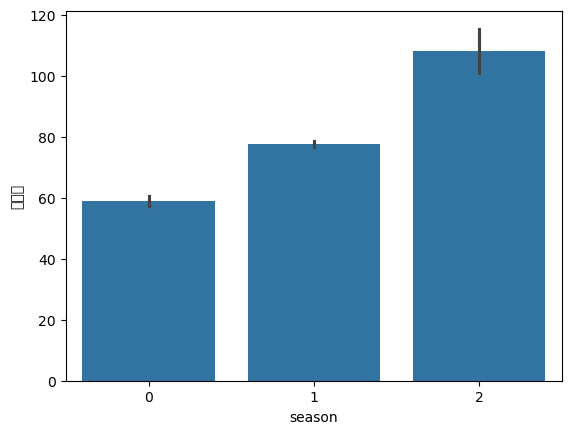

In [20]:
sns.barplot(data=hong_for, x='season', y='승객수')

plt.show()

In [21]:
hong_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       11560 non-null  int64         
 1   월       11560 non-null  int64         
 2   date    11560 non-null  datetime64[ns]
 3   day     11560 non-null  category      
 4   time    11560 non-null  int64         
 5   승객유형    11560 non-null  object        
 6   승객수     11560 non-null  float64       
 7   vac     11560 non-null  int64         
 8   일       11560 non-null  int32         
 9   season  11560 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(5), object(1)
memory usage: 779.4+ KB


In [22]:
# hong_for.drop(
#     ['date', '일'],
#     axis=1,
#     inplace=True
# )

In [23]:
hong_for.drop(
    '승객유형',
    axis=1,
    inplace=True
)

In [24]:
day_map = {'월':0, '화':0, '수':0, '목':0, '금':1, '일':1, '토':2}
hong_for['day']=hong_for['day'].map(day_map)
hong_for.head()

,년,월,date,day,time,승객수,vac,일,season
0,2022,11,2022-11-01,0,5,6.0,0,1,1
1,2022,11,2022-11-01,0,6,8.0,0,1,1
2,2022,11,2022-11-01,0,7,13.0,0,1,1
3,2022,11,2022-11-01,0,8,7.0,0,1,1
4,2022,11,2022-11-01,0,9,33.0,0,1,1


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/var/folders/r4/77

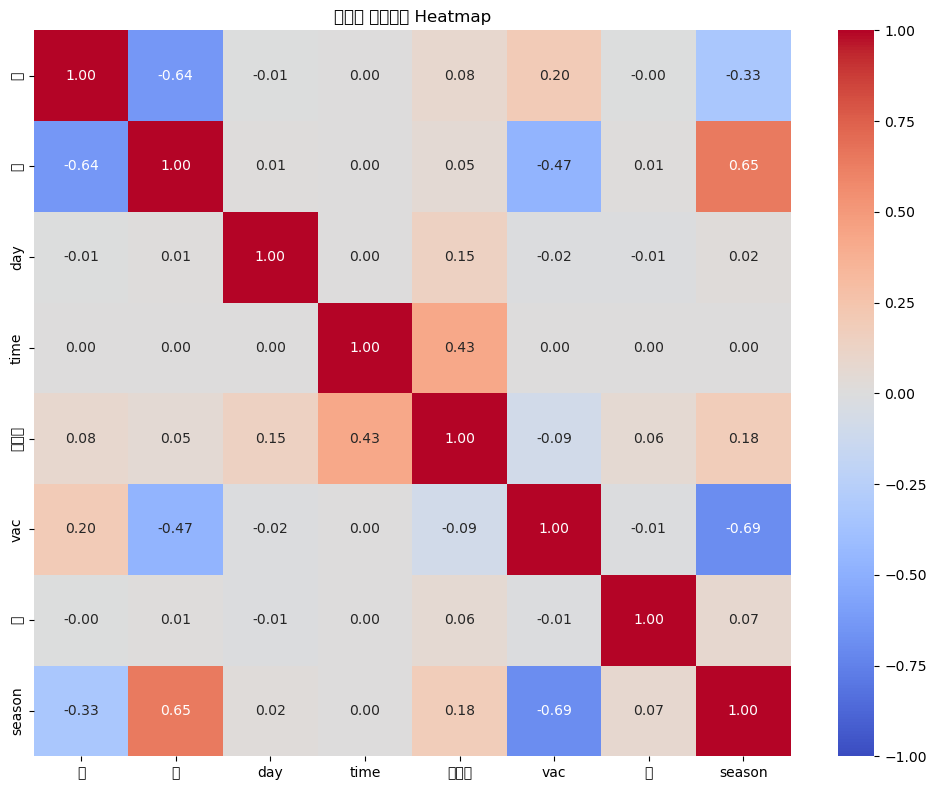

In [25]:
corr_matrix=hong_for.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.title('외국인 상관계수 Heatmap')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
# hongfor_x = hong_for[['년','월','day','time']]
hongfor_x = hong_for[['년','season','day','time']]
# hongfor_x = hong_for[['년','월','season','day','time']]
hongfor_y = hong_for['승객수']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    hongfor_x, 
    hongfor_y, 
    test_size=0.2,
    random_state=42
    # shuffle=
)

In [30]:
# Random Forest
rf_model = RandomForestRegressor()

# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [31]:
rf_model.fit(X_train,y_train)
print('RF_Train:',rf_model.score(X_train,y_train))
print('RF_Test:',rf_model.score(X_test,y_test))

dt_model.fit(X_train, y_train)
print('DT_Train:',dt_model.score(X_train,y_train))
print('DT_Test:',dt_model.score(X_test,y_test))

gb_model.fit(X_train, y_train)
print('GB_Train:',gb_model.score(X_train,y_train))
print('GB_Test:',gb_model.score(X_test,y_test))

gpr_model.fit(X_train, y_train)
print('GPR_Train:',gpr_model.score(X_train,y_train))
print('GPR_Test:',gpr_model.score(X_test,y_test))

et_model.fit(X_train, y_train)
print('ET_Train:',et_model.score(X_train,y_train))
print('ET_Test:',et_model.score(X_test,y_test))

knn_model.fit(X_train, y_train)
print('KNN_Train:',knn_model.score(X_train,y_train))
print('KNN_Test:',knn_model.score(X_test,y_test))

RF_Train: 0.8302537597903465
RF_Test: 0.8215363509564317
DT_Train: 0.8305726097374362
DT_Test: 0.8203436328687624
GB_Train: 0.8230049456930286
GB_Test: 0.8273001539697844
GPR_Train: 0.8305726039400331
GPR_Test: 0.8192942563423026
ET_Train: 0.8305726097374362
ET_Test: 0.8209516424717931
KNN_Train: 0.796524164285335
KNN_Test: 0.7860374329184366


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

years = X_test['년'].unique()

for year in years:
    year_mask = X_test['년'] == year
    y_true_year = y_test[year_mask]
    y_pred_year = y_pred[year_mask]
    
    mse = mean_squared_error(y_true_year, y_pred_year)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_year, y_pred_year)
    
    print(f"Year {year}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print()

Year 2023:
  RMSE: 20.40
  R2 Score: 0.84

Year 2024:
  RMSE: 26.79
  R2 Score: 0.77

Year 2022:
  RMSE: 19.53
  R2 Score: 0.82



---
### 2022 전체 데이터 포함, 규제 완화 컬럼 추가

In [33]:
for_all = pd.read_csv('../data/hong_for.csv')
for_all.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,수,5,외국인,1.0,0
1,2022,6,2022-06-01,수,6,외국인,0.0,0
2,2022,6,2022-06-01,수,7,외국인,1.0,0
3,2022,6,2022-06-01,수,8,외국인,0.0,0
4,2022,6,2022-06-01,수,9,외국인,3.0,0


In [34]:
for_all['date']=pd.to_datetime(for_all['date'])
for_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       14620 non-null  int64         
 1   월       14620 non-null  int64         
 2   date    14620 non-null  datetime64[ns]
 3   day     14620 non-null  object        
 4   time    14620 non-null  int64         
 5   승객유형    14620 non-null  object        
 6   승객수     14620 non-null  float64       
 7   vac     14620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 913.9+ KB


/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  plt.tight_layout()
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2915/4168858217.py:12: UserWarning

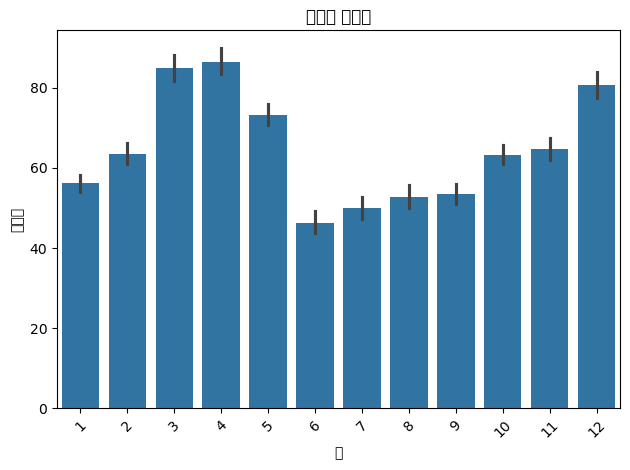

In [35]:
sns.barplot(data=for_all, x='월', y='승객수')

# 그래프 제목과 레이블 설정
plt.title('외국인 승객수')
plt.xlabel('월')
plt.ylabel('승객수')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

**관광객이 대폭 늘어난 2024년도 data는 5월까지만 포함되어 있어서 6~12월의 승객수 평균이 감소한 것으로 보인다.**     
> season column은 규제 완화 데이터 기준으로 생성하기

In [36]:
for_all['day'].unique()

array(['수', '목', '금', '토', '일', '월', '화'], dtype=object)

In [37]:
for_all['day']=for_all['day'].map(day_map)
for_all.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,0,5,외국인,1.0,0
1,2022,6,2022-06-01,0,6,외국인,0.0,0
2,2022,6,2022-06-01,0,7,외국인,1.0,0
3,2022,6,2022-06-01,0,8,외국인,0.0,0
4,2022,6,2022-06-01,0,9,외국인,3.0,0


In [38]:
for_all.drop(
    ['승객유형','vac'],
    axis=1,
    inplace=True
)

### 규제 완화(regu)
- 규제 완화 이전(date < 2022-10-01): 0
- 규제 완화 이후(date >= 2022-10-01): 1

In [39]:
for_all['regu'] = for_all['date'].apply(
    lambda x: 0 if  x <  pd.Timestamp('2022-10-01') 
    else 1
)

In [40]:
for_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       14620 non-null  int64         
 1   월       14620 non-null  int64         
 2   date    14620 non-null  datetime64[ns]
 3   day     14620 non-null  int64         
 4   time    14620 non-null  int64         
 5   승객수     14620 non-null  float64       
 6   regu    14620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 799.7 KB


### season

In [41]:
for_all['일'] = for_all['date'].dt.day

In [42]:
for_all.head()

,년,월,date,day,time,승객수,regu,일
0,2022,6,2022-06-01,0,5,1.0,0,1
1,2022,6,2022-06-01,0,6,0.0,0,1
2,2022,6,2022-06-01,0,7,1.0,0,1
3,2022,6,2022-06-01,0,8,0.0,0,1
4,2022,6,2022-06-01,0,9,3.0,0,1


In [43]:
for_all['season'] = np.where(
    ((for_all['월'] == 1) & (for_all['일'] >= 2)) |
    (for_all['월'] == 2),
    0,  # 첫 번째 조건에 해당하는 경우
    np.where(
        ((for_all['월'] == 12) & (for_all['일'] >= 24)) |
        ((for_all['월'] == 1) & (for_all['일'] == 1)),
        2,  # 두 번째 조건에 해당하는 경우
        1   # 나머지 경우
    )
)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/var/folders/r4/77

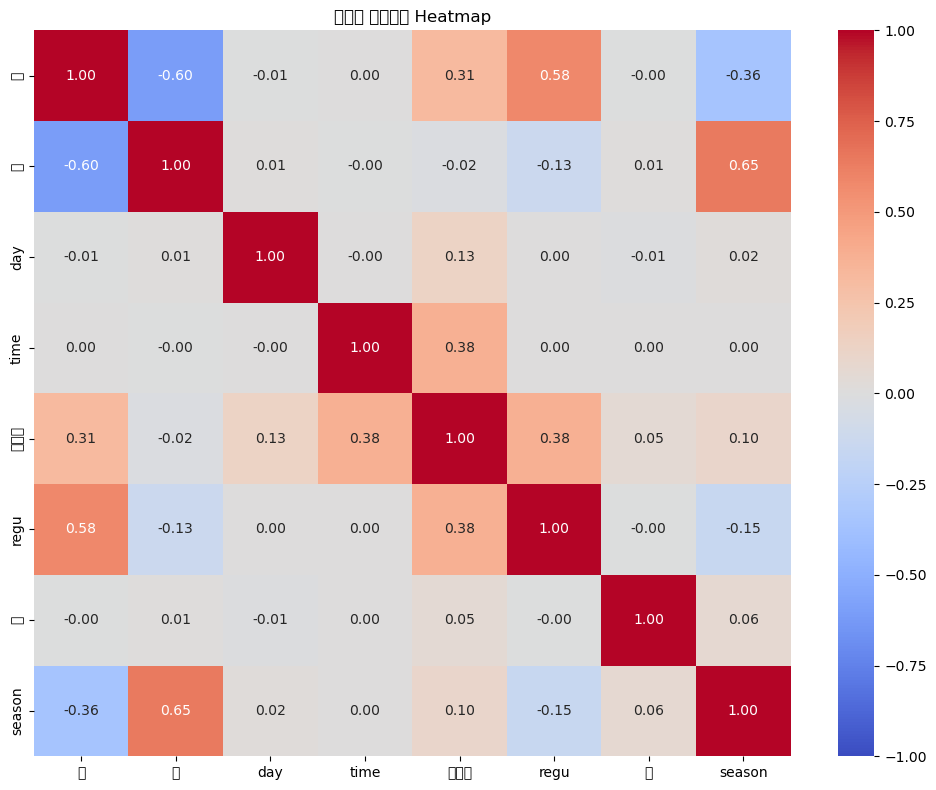

In [44]:
corr_matrix=for_all.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.title('외국인 상관계수 Heatmap')
plt.tight_layout()
plt.show()

### 규제 컬럼 추가 모델 생성

In [45]:
# forall_x = for_all[['년','월','season','day','time','regu']]
# forall_x = for_all[['년','월','day','time','regu']]
forall_x = for_all[['년','season','day','time','regu']]
# forall_x = for_all[['season','day','time','regu']]

forall_y = for_all['승객수']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    forall_x, 
    forall_y, 
    test_size=0.2,
    random_state=42
    # shuffle=
)

In [47]:
rf_model.fit(X_train,y_train)
print('RF_Train:',rf_model.score(X_train,y_train))
print('RF_Test:',rf_model.score(X_test,y_test))

dt_model.fit(X_train, y_train)
print('DT_Train:',dt_model.score(X_train,y_train))
print('DT_Test:',dt_model.score(X_test,y_test))

gb_model.fit(X_train, y_train)
print('GB_Train:',gb_model.score(X_train,y_train))
print('GB_Test:',gb_model.score(X_test,y_test))

gpr_model.fit(X_train, y_train)
print('GPR_Train:',gpr_model.score(X_train,y_train))
print('GPR_Test:',gpr_model.score(X_test,y_test))

et_model.fit(X_train, y_train)
print('ET_Train:',et_model.score(X_train,y_train))
print('ET_Test:',et_model.score(X_test,y_test))

knn_model.fit(X_train, y_train)
print('KNN_Train:',knn_model.score(X_train,y_train))
print('KNN_Test:',knn_model.score(X_test,y_test))

RF_Train: 0.8500346090956403
RF_Test: 0.8440214897161855
DT_Train: 0.8503885968887577
DT_Test: 0.8418452544016825
GB_Train: 0.8421716696615646
GB_Test: 0.846019914939227
GPR_Train: 0.8503885924889234
GPR_Test: 0.8383964719324545
ET_Train: 0.8503885968887578
ET_Test: 0.8419629000897434
KNN_Train: 0.8122026478793577
KNN_Test: 0.8074442169276764


> **전체 데이터를 포함하니 예측력이 올라갔다. 하지만 이 모델에서 미래의 예측률이 더 높을 지는 모르겠다.**

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

years = X_test['년'].unique()

for year in years:
    year_mask = X_test['년'] == year
    y_true_year = y_test[year_mask]
    y_pred_year = y_pred[year_mask]
    
    mse = mean_squared_error(y_true_year, y_pred_year)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_year, y_pred_year)
    
    print(f"Year {year}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print()

Year 2022:
  RMSE: 15.35
  R2 Score: 0.80

Year 2024:
  RMSE: 27.55
  R2 Score: 0.77

Year 2023:
  RMSE: 19.81
  R2 Score: 0.86

